In [51]:
import matplotlib.pyplot as plt 
import torch 
from torchvision import datasets
from torchvision import transforms

In [4]:
data_path = '../../CIFAR-10_data/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
len(cifar10)

50000

In [6]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,transform=transforms.ToTensor())

Classify birds-planes

In [13]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

In [37]:
cifar2 = [(img, label_map[label])
for img, label in cifar10
if label in [0, 2]]

In [38]:
cifar2_val = [(img, label_map[label])
for img, label in cifar10_val
if label in [0, 2]]

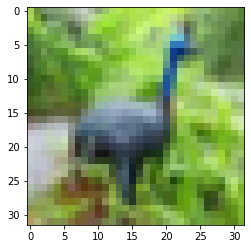

In [47]:
to_tensor = transforms.ToTensor()
img, _ = cifar2[0]
img_t = to_tensor(img)
img_t.shape

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [40]:
import torch.nn as nn
n_out = 2

In [41]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(), 
    nn.Linear(512,2),
    nn.Softmax(dim=1)
)

In [48]:
img_batch = img_t.view(-1).unsqueeze(0)

In [49]:
out = model(img_batch)
out

tensor([[0.5381, 0.4619]], grad_fn=<SoftmaxBackward>)

In [52]:
_, index = torch.max(out, dim=1)
index

tensor([0])